# CITS4403: Computational Modelling - Group Project
## Corona Virus Outbreak - Dataset from Kaggle
### By Jayden Kur, 21988713
### Roarke, 21742366
### Andrew, 22246801

In [102]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

#from utils import decorate, savefig

# I set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

# TODO: remove this when NetworkX is fixed
from warnings import simplefilter
import matplotlib.cbook
simplefilter("ignore", matplotlib.cbook.mplDeprecation)

In [103]:
G = nx.MultiGraph()   # or MultiDiGraph
nx.add_path(G, [0, 1, 2])
key = G.add_edge(2, 3, weight=5)
nx.add_path(G, [2,1,0])

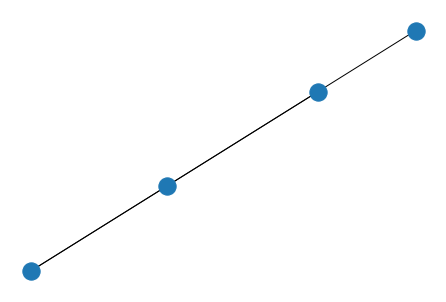

In [104]:
attrs = {0: {'Cases': 20, 'Males': 1, 'Females': 1, 'Age Groups': 1}}
nx.set_node_attributes(G, attrs)
G.nodes[0]['Cases']
nx.draw(G)

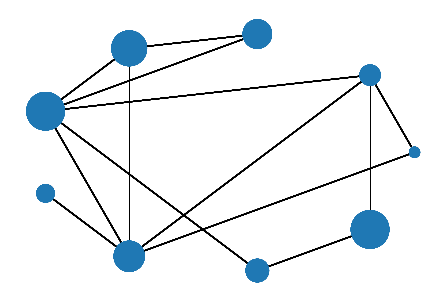

In [105]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')
import networkx as nx
import random

# Graph initialization
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9])
G.add_edges_from([(1,2), (3,4), (2,5), (4,5), (6,7), (8,9), (4,7), (1,7), (3,5), (2,7), (5,8), (2,9), (5,7)])
colors = ['r', 'b', 'g', 'y', 'w', 'm']
sizes = [100,400,800,1200,1400,300,900,500,1400]
# Animation function
def animate(i):
    nx.draw_circular(G, node_size=[sizes[j] for j in range(9)])
    #nx.draw_circular(G, node_color=[random.choice(colors) for j in range(9)])

#nx.draw_circular(G)
fig = plt.figure()

# Animator call
anim = FuncAnimation(fig, animate, frames=20, interval=200, repeat=True)
anim.save('test.gif', writer='imagemagick')

Reads in data from csv file

In [106]:
import pandas as pd
df = pd.read_csv("PatientInfo.csv", usecols = ['patient_id','sex','age','city','confirmed_date'])

In [107]:
df.head()

,patient_id,sex,age,city,confirmed_date
0,1000000001,male,50s,Gangseo-gu,23/1/20
1,1000000002,male,30s,Jungnang-gu,30/1/20
2,1000000003,male,50s,Jongno-gu,30/1/20
3,1000000004,male,20s,Mapo-gu,30/1/20
4,1000000005,female,20s,Seongbuk-gu,31/1/20


In [108]:
#Use patient_id as the index
df = df.set_index('patient_id')

In [109]:
df.head()

,sex,age,city,confirmed_date
patient_id,,,,
1000000001,male,50s,Gangseo-gu,23/1/20
1000000002,male,30s,Jungnang-gu,30/1/20
1000000003,male,50s,Jongno-gu,30/1/20
1000000004,male,20s,Mapo-gu,30/1/20
1000000005,female,20s,Seongbuk-gu,31/1/20


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2771 entries, 1000000001 to 7000000009
Data columns (total 4 columns):
sex               2765 non-null object
age               2758 non-null object
city              2703 non-null object
confirmed_date    2771 non-null object
dtypes: object(4)
memory usage: 108.2+ KB


In [111]:
#Drop any row with null value
df = df.dropna(how='any',axis=0);
#Drop any row with 'city' = etc
df = df[~df.city.str.contains("etc")];

# Korea City info - https://www.kaggle.com/kimjihoo/coronavirusdataset/discussion/132763

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 1000000001 to 7000000009
Data columns (total 4 columns):
sex               2655 non-null object
age               2655 non-null object
city              2655 non-null object
confirmed_date    2655 non-null object
dtypes: object(4)
memory usage: 103.7+ KB


In [113]:
temp = df.city.unique()

In [114]:
len(df.city.unique())

138

In [115]:
temp.sort()

In [116]:
temp

array(['Andong-si', 'Ansan-si', 'Anseong-si', 'Anyang-si', 'Asan-si',
       'Bonghwa-gun', 'Bucheon-si', 'Buk-gu', 'Bupyeong-gu',
       'Busanjin-gu', 'Buyeo-gun', 'Changnyeong-gun', 'Changwon-si',
       'Cheonan-si', 'Cheongdo-gun', 'Cheongju-si', 'Cheongsong-gun',
       'Chilgok-gun', 'Chuncheon-si', 'Chungju-si', 'Daedeok-gu',
       'Dalseo-gu', 'Dalseong-gun', 'Danyang-gun', 'Dobong-gu', 'Dong-gu',
       'Dongdaemun-gu', 'Dongjak-gu', 'Dongnae-gu', 'Eumseong-gun',
       'Eunpyeong-gu', 'Gangbuk-gu', 'Gangdong-gu', 'Gangnam-gu',
       'Gangneung-si', 'Gangseo-gu', 'Geochang-gun', 'Geoje-si',
       'Geumcheon-gu', 'Geumjeong-gu', 'Gijang-gun', 'Gimcheon-si',
       'Gimhae-si', 'Gimje-si', 'Gimpo-si', 'Goesan-gun', 'Goryeong-gun',
       'Goseong-gun', 'Goyang-si', 'Gumi-si', 'Gunpo-si', 'Gunsan-si',
       'Guri-si', 'Guro-gu', 'Gwacheon-si', 'Gwanak-gu', 'Gwangjin-gu',
       'Gwangju-si', 'Gwangmyeong-si', 'Gwangyang-si', 'Gyeongju-si',
       'Gyeongsan-si', 'Gyeryong-si

In [117]:
df.confirmed_date.unique()

array(['23/1/20', '30/1/20', '31/1/20', '5/2/20', '6/2/20', '16/2/20',
       '19/2/20', '20/2/20', '21/2/20', '22/2/20', '23/2/20', '26/2/20',
       '24/2/20', '25/2/20', '27/2/20', '28/2/20', '29/2/20', '1/3/20',
       '2/3/20', '4/3/20', '5/3/20', '6/3/20', '7/3/20', '8/3/20',
       '9/3/20', '10/3/20', '11/3/20', '12/3/20', '13/3/20', '14/3/20',
       '15/3/20', '16/3/20', '17/3/20', '18/3/20', '19/3/20', '20/3/20',
       '21/3/20', '22/3/20', '23/3/20', '24/3/20', '25/3/20', '26/3/20',
       '27/3/20', '28/3/20', '29/3/20', '3/3/20', '18/2/20', '26/1/20',
       '27/1/20', '1/2/20', '2/2/20', '9/2/20', '10/2/20', '30/3/20'],
      dtype=object)

In [118]:
len(df.confirmed_date.unique())

54

In [119]:
df

,sex,age,city,confirmed_date
patient_id,,,,
1000000001,male,50s,Gangseo-gu,23/1/20
1000000002,male,30s,Jungnang-gu,30/1/20
1000000003,male,50s,Jongno-gu,30/1/20
1000000004,male,20s,Mapo-gu,30/1/20
1000000005,female,20s,Seongbuk-gu,31/1/20
1000000006,female,50s,Jongno-gu,31/1/20
1000000007,male,20s,Jongno-gu,31/1/20
1000000009,male,30s,Songpa-gu,5/2/20
1000000010,female,60s,Seongbuk-gu,5/2/20


In [120]:
df['confirmed_date'] = pd.to_datetime(df['confirmed_date'], format='%d/%m/%y').dt.strftime('%m%d')

In [121]:
df

,sex,age,city,confirmed_date
patient_id,,,,
1000000001,male,50s,Gangseo-gu,0123
1000000002,male,30s,Jungnang-gu,0130
1000000003,male,50s,Jongno-gu,0130
1000000004,male,20s,Mapo-gu,0130
1000000005,female,20s,Seongbuk-gu,0131
1000000006,female,50s,Jongno-gu,0131
1000000007,male,20s,Jongno-gu,0131
1000000009,male,30s,Songpa-gu,0205
1000000010,female,60s,Seongbuk-gu,0205


In [122]:
unique_cities = temp

In [123]:
graph = nx.Graph()
for city in unique_cities:
    graph.add_node(city)

In [177]:
node_names = df['city'].value_counts().index.to_list()
node_sizes = df['city'].value_counts().to_list()

In [178]:
node_list = [node_name,node_sizes]

In [179]:
node_list[0][0]

'Gyeongsan-si'

In [180]:
node_list[1][0]

614

In [201]:
node_size = [50*node_list[1][ii] for ii in range(len(node_names))] # MADE THIS 50 * COUNT as the values were too small to see

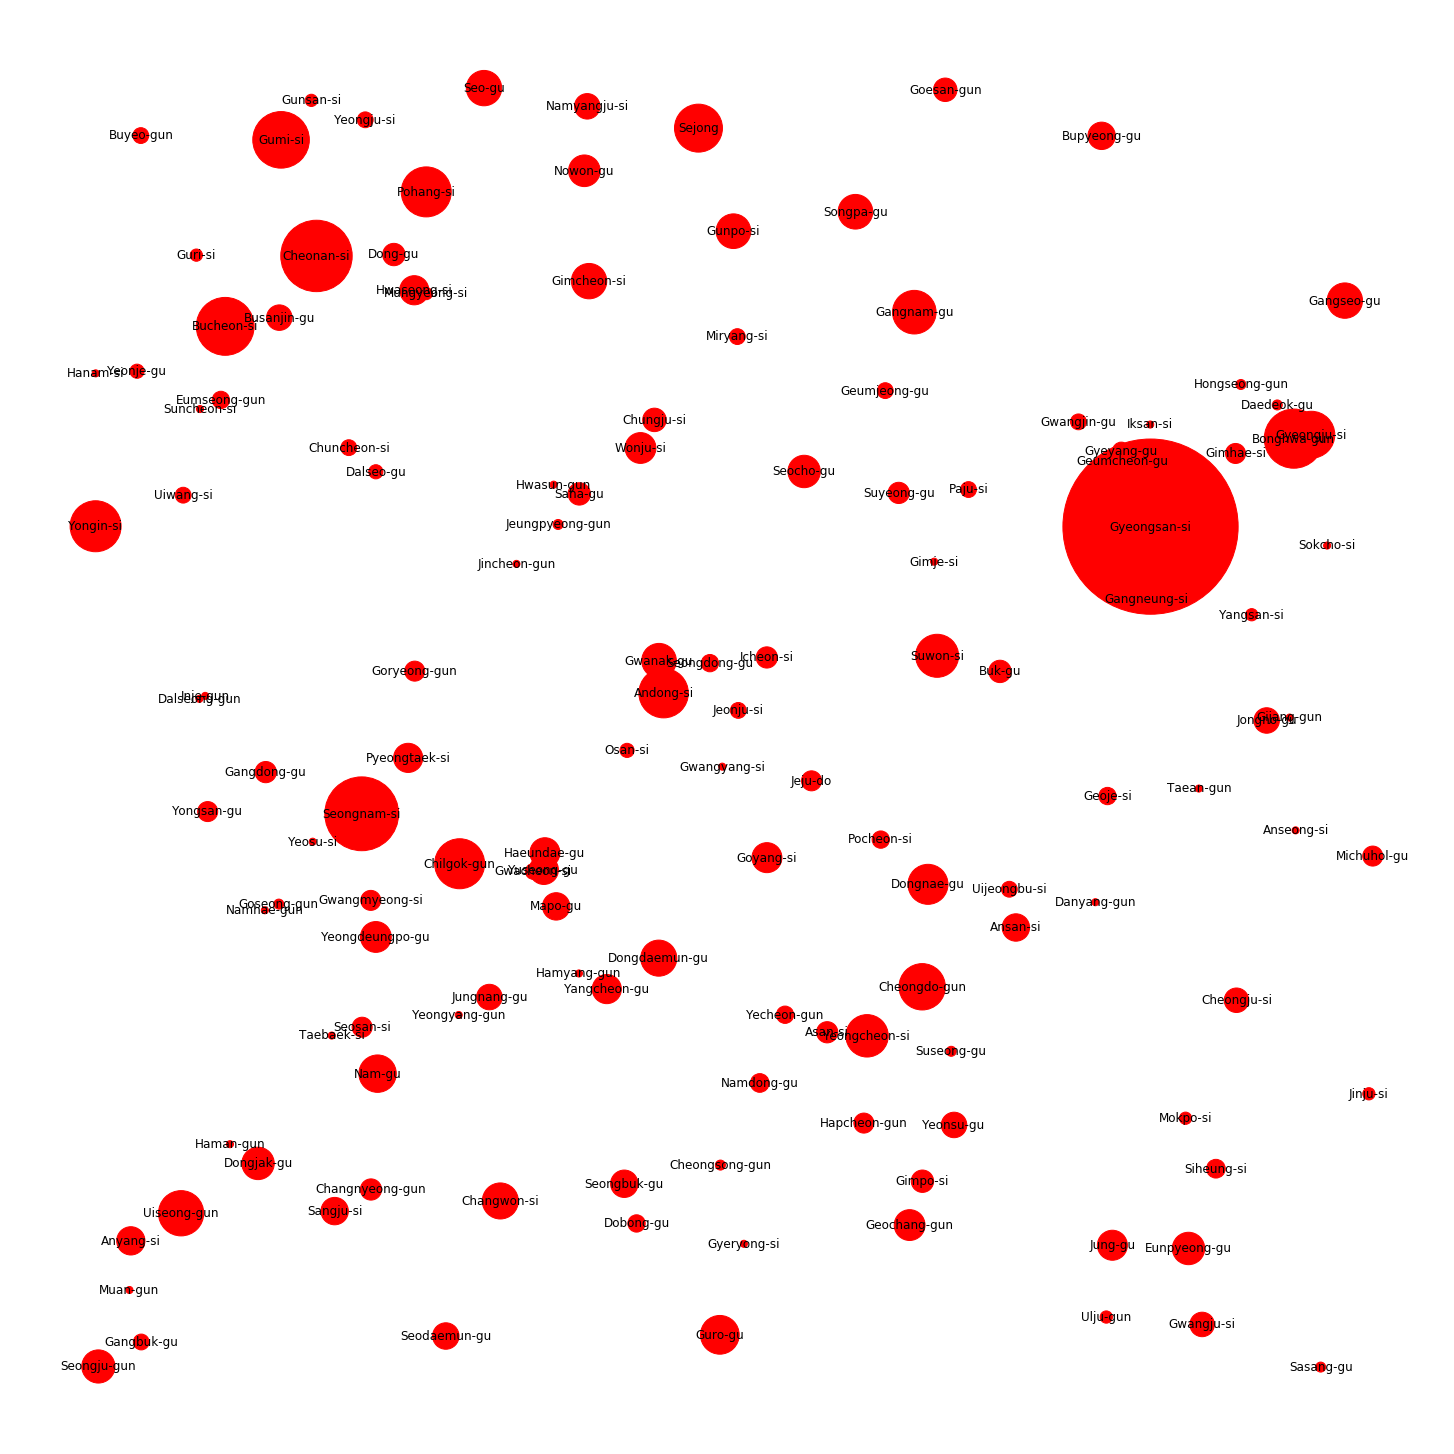

In [210]:
pos = nx.random_layout(graph)
plt.figure(1,figsize=(20,20)) 
nx.draw(graph,pos,nodelist=node_names,node_size=node_size,node_color='red',with_labels=True)
plt.axis('equal')
plt.show()